In [1]:
pip install pandas pycountry matplotlib seaborn langdetect translate textblob openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from langdetect import detect

In [3]:
df = pd.read_excel('output.xlsx')

In [4]:
df = df.rename(columns={'Party_1': 'The Parties'})
df = df.rename(columns={'Party_2': 'Respondent'})

In [5]:
def detect_language(text):
    try:
        return detect(text)
    except Exception as ex:
        return 'unknown'

In [6]:
df['Detected Language'] = df['Heading'].apply(detect_language)

In [8]:
df

,Heading,The Parties,Respondent,Decision,Date,Detected Language
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca
...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de


In [9]:

# Define regex pattern to extract name between "is" or "are" and "represented"
pattern = r"(?:is|are)\s(.*?)\srepresented"

# Function to extract name before "represented" from text
def extract_plaintiff(text):
    # some parties are null so we have to check that
    if pd.isnull(text):
        return None
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None

# Apply the function to create a new column 'Lawfirms'
df['Plaintiff'] = df['The Parties'].apply(extract_plaintiff)

# Display the DataFrame with the new column
df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,"
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,"
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B..."
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,"
...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un..."
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,"
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA..."
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None


In [10]:
# Define regex pattern to extract name after "represented by"
pattern = r"represented by\s(.*)"

# Function to extract name before "represented" from text
def extract_lawfirms(text):
    if pd.isnull(text):
        return None
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None

# Apply the function to create a new column 'Lawfirms'
df['Lawfirms'] = df['The Parties'].apply(extract_lawfirms)

# Display the DataFrame with the new column
df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff,Lawfirms
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,","Cabinet Laurent & Charras, France."
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...,"Sipara, United Kingdom of Great Britain and No..."
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,","Melbourne IT Digital Brand Services, Stockholm..."
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B...","Dannemann Siemsen, Brazil."
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,","Kivial s.r.l, Italy."
...,...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un...","Lewis & Lin, LLC, United States of America."
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,",None
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA...","Covington & Burling, United States of America."
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None,None


In [11]:
pattern = r'is\s+([A-Za-z\s,.-]+)'

# Function to extract company name from text
def extract_respondent_name(text):
    match = re.search(pattern, text)
    if match:
        return match.group(1).strip()
    else:
        return None

# Apply the function to create a new column 'Defendant_Name'
df['Respondent_Name'] = df['Respondent'].apply(extract_respondent_name)

# Display the DataFrame with the new column
df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff,Lawfirms,Respondent_Name
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,","Cabinet Laurent & Charras, France.","Hoomaan Sheikholeslami, EDEN Advertising Group..."
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...,"Sipara, United Kingdom of Great Britain and No...","Cyril Ferrao of Leonia, New Jersey, United Sta..."
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,","Melbourne IT Digital Brand Services, Stockholm...",None
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B...","Dannemann Siemsen, Brazil.","Maria Mello of Sao Paulo, Brazil."
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,","Kivial s.r.l, Italy.",xmyilong company
...,...,...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un...","Lewis & Lin, LLC, United States of America.","Whoisguard, Inc. of Panama City, Panama"
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,",None,"Chrisper Economy APS, Christian Dam Rasmussen ..."
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA...","Covington & Burling, United States of America.","AID Guard of Mississauga, Ontario, Canada."
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None,None,None


In [12]:
country_pattern = r'(?i)' + '|'.join([country.name for country in pycountry.countries])

# Function to extract country from text
def extract_country(text):
    # Assurez-vous que le texte est une chaîne de caractères
    if pd.isnull(text):
        return None
    match = re.search(country_pattern, str(text))
    if match:
        # Utilisez group(0) pour retourner le match complet
        return match.group(0).strip()
    else:
        return None
        
# Apply the function to create a new column 'Countries_Party1'
df['Countries_Plaintiff'] = df['Plaintiff'].apply(extract_country)
df['Countries_Respondent'] = df['Respondent'].apply(extract_country)

# Display the DataFrame with the new column
df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff,Lawfirms,Respondent_Name,Countries_Plaintiff,Countries_Respondent
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,","Cabinet Laurent & Charras, France.","Hoomaan Sheikholeslami, EDEN Advertising Group...",France,United Kingdom
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...,"Sipara, United Kingdom of Great Britain and No...","Cyril Ferrao of Leonia, New Jersey, United Sta...",United States,Jersey
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,","Melbourne IT Digital Brand Services, Stockholm...",None,Denmark,China
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B...","Dannemann Siemsen, Brazil.","Maria Mello of Sao Paulo, Brazil.",Brazil,Brazil
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,","Kivial s.r.l, Italy.",xmyilong company,Italy,United States
...,...,...,...,...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un...","Lewis & Lin, LLC, United States of America.","Whoisguard, Inc. of Panama City, Panama",United States,Panama
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,",None,"Chrisper Economy APS, Christian Dam Rasmussen ...",Germany,Denmark
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA...","Covington & Burling, United States of America.","AID Guard of Mississauga, Ontario, Canada.",United States,Canada
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None,None,None,None,None


In [13]:
transfer_pattern = r'transferred'
deletion_pattern = r'deleted|delete|cancelled'
rejection_pattern = r'denied|declines'

# Function to extract decision category
def extract_decision_category(decision):
    if isinstance(decision, str):  # Check if the decision is a string
        if re.search(transfer_pattern, decision, re.IGNORECASE):
            return 'Transfer'
        elif re.search(deletion_pattern, decision, re.IGNORECASE):
            return 'Deletion'
        elif re.search(rejection_pattern, decision, re.IGNORECASE):
            return 'Rejection'
    return 'Other'  # Return 'Other' for non-string values



In [14]:
# Apply the function to create a new column 'Decision_Categories'
df['Decision_Categories'] = df['Decision'].astype(str).apply(extract_decision_category)

df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff,Lawfirms,Respondent_Name,Countries_Plaintiff,Countries_Respondent,Decision_Categories
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,","Cabinet Laurent & Charras, France.","Hoomaan Sheikholeslami, EDEN Advertising Group...",France,United Kingdom,Transfer
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...,"Sipara, United Kingdom of Great Britain and No...","Cyril Ferrao of Leonia, New Jersey, United Sta...",United States,Jersey,Transfer
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,","Melbourne IT Digital Brand Services, Stockholm...",None,Denmark,China,Transfer
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B...","Dannemann Siemsen, Brazil.","Maria Mello of Sao Paulo, Brazil.",Brazil,Brazil,Transfer
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,","Kivial s.r.l, Italy.",xmyilong company,Italy,United States,Transfer
...,...,...,...,...,...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un...","Lewis & Lin, LLC, United States of America.","Whoisguard, Inc. of Panama City, Panama",United States,Panama,Transfer
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,",None,"Chrisper Economy APS, Christian Dam Rasmussen ...",Germany,Denmark,Transfer
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA...","Covington & Burling, United States of America.","AID Guard of Mississauga, Ontario, Canada.",United States,Canada,Transfer
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None,None,None,None,None,Other


In [15]:
date_pattern = r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}'

# Function to extract date from text
def extract_date(text):
    if isinstance(text, str):  # Check if the text is a string
        match = re.search(date_pattern, text)
        if match:
            return match.group()
    return None  # Return None for non-string values

# Apply the function to create a new column 'Date'
df['Dates'] = df['Date'].apply(extract_date)

df

,Heading,The Parties,Respondent,Decision,Date,Detected Language,Plaintiff,Lawfirms,Respondent_Name,Countries_Plaintiff,Countries_Respondent,Decision_Categories,Dates
0,"LPG Systems v. Hoomaan Sheikholeslami, EDEN Ad...","The Complainant is LPG Systems of Valence, Fra...","The Respondent is Hoomaan Sheikholeslami, EDEN...","For all the foregoing reasons, in accordance w...","Lana I Habash Sole PanelistDated: January 5, 2012",en,"LPG Systems of Valence, France,","Cabinet Laurent & Charras, France.","Hoomaan Sheikholeslami, EDEN Advertising Group...",France,United Kingdom,Transfer,"January 5, 2012"
1,The California Milk Processor Board v. Cyril F...,Complainant is The California Milk Processor B...,"Respondent is Cyril Ferrao of Leonia, New Jers...","For the foregoing reasons, in accordance with ...",Jeffrey D. Steinhardt Sole PanelistDated: Janu...,en,The California Milk Processor Board of San Cle...,"Sipara, United Kingdom of Great Britain and No...","Cyril Ferrao of Leonia, New Jersey, United Sta...",United States,Jersey,Transfer,"January 2, 2012"
2,"LEGO Juris A/S v. Domains by Proxy, Inc. and J...","The Complainant is LEGO Juris A/S of Billund, ...","The Respondents are Jiahong Zhu, of Guangdong,...","For the foregoing reasons, in accordance with ...","Thomas L. Creel Sole PanelistDated: January 3,...",en,"LEGO Juris A/S of Billund, Denmark,","Melbourne IT Digital Brand Services, Stockholm...",None,Denmark,China,Transfer,"January 3, 2012"
3,Natura Cosmeticos S/A v. Maria Mello,The Complainant is Natura Cosmeticos S/A of Ba...,"The Respondent is Maria Mello of Sao Paulo, Br...","For the foregoing reasons, in accordance with ...","Erica Aoki Sole PanelistDated: January 11, 2012",it,"Natura Cosmeticos S/A of Barueri, Sao Paulo, B...","Dannemann Siemsen, Brazil.","Maria Mello of Sao Paulo, Brazil.",Brazil,Brazil,Transfer,"January 11, 2012"
4,Duvetica S.r.l. v. xmyilong company / davis lin,"Complainant is Duvetica S.r.l. of Venezia, Ita...",Respondent is xmyilong company / davis lin of ...,"For the foregoing reasons, in accordance with ...",Gerardo Saavedra Sole PanelistDated: December ...,ca,"Duvetica S.r.l. of Venezia, Italy,","Kivial s.r.l, Italy.",xmyilong company,Italy,United States,Transfer,"December 23, 2011"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,"AAC Enterprises LLC v. Whoisguard, Inc. / Zain...",The Complainant is AAC Enterprises LLC of Meta...,"The Respondent is Whoisguard, Inc. of Panama C...","For the foregoing reasons, in accordance with ...","Angela FoxSole PanelistDate: September 15, 2015",de,"AAC Enterprises LLC of Metairie, Louisiana, Un...","Lewis & Lin, LLC, United States of America.","Whoisguard, Inc. of Panama City, Panama",United States,Panama,Transfer,"September 15, 2015"
10548,"adp Gauselmann GmbH v. Chrisper Economy APS, C...",The Complainant is adp Gauselmann GmbH of Espe...,"The Respondent is Chrisper Economy APS, Christ...","For the foregoing reasons, in accordance with ...",Jonas GullikssonSole PanelistDate: September 2...,en,"adp Gauselmann GmbH of Espelkamp, Germany,",None,"Chrisper Economy APS, Christian Dam Rasmussen ...",Germany,Denmark,Transfer,"September 29, 2015"
10549,"The American Automobile Association, Inc. (“AA...",The Complainant is The American Automobile Ass...,"The Respondent is AID Guard of Mississauga, On...","For the foregoing reasons, in accordance with ...",William R. TownsSole PanelistDate: September 1...,en,"The American Automobile Association, Inc. (“AA...","Covington & Burling, United States of America.","AID Guard of Mississauga, Ontario, Canada.",United States,Canada,Transfer,"September 18, 2015"
10550,Dr. phil. Axel Daase Schmerztherapie AG gegen ...,Die Gesuchstellerin ist Dr. phil. Axel Daase S...,Die Gesuchsgegnerin ist Plan C Fitness AG aus ...,Aus den vorstehenden Gründen entscheidet der E...,Tobias ZuberbühlerExperteDatum: 18. September ...,de,None,None,None,None,None,Other,None


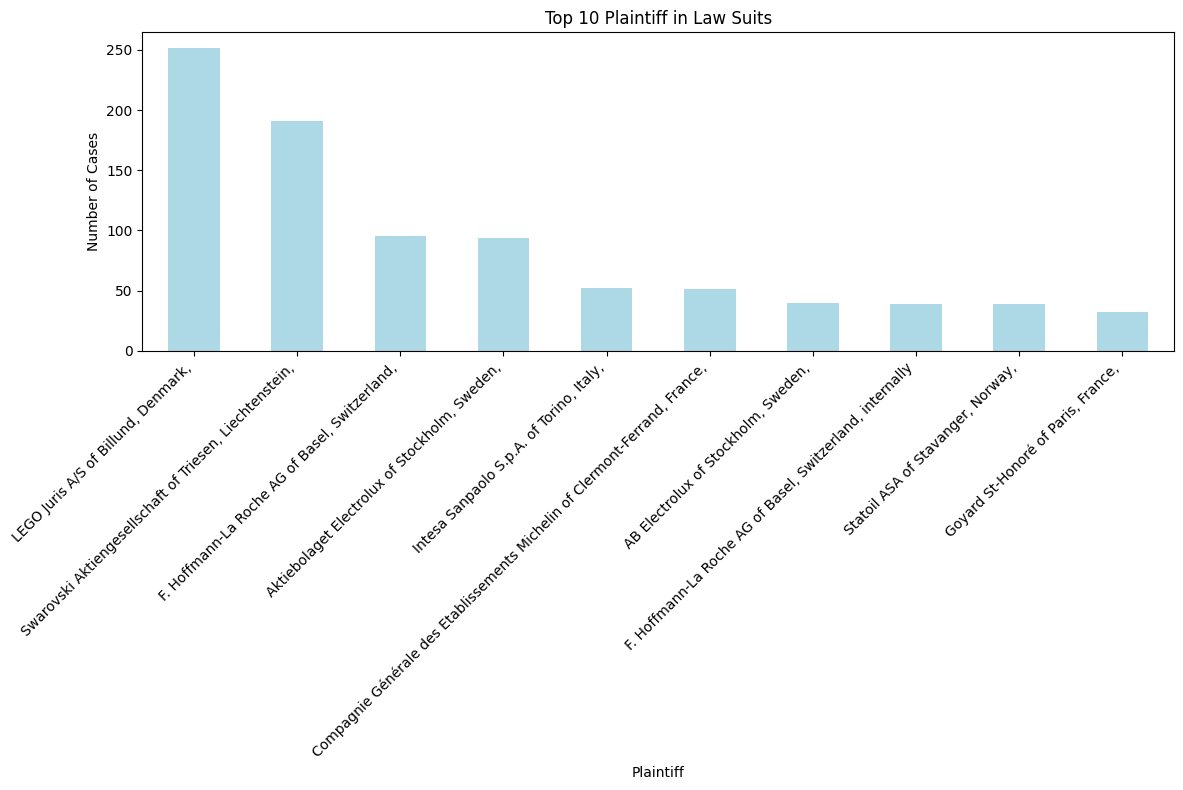

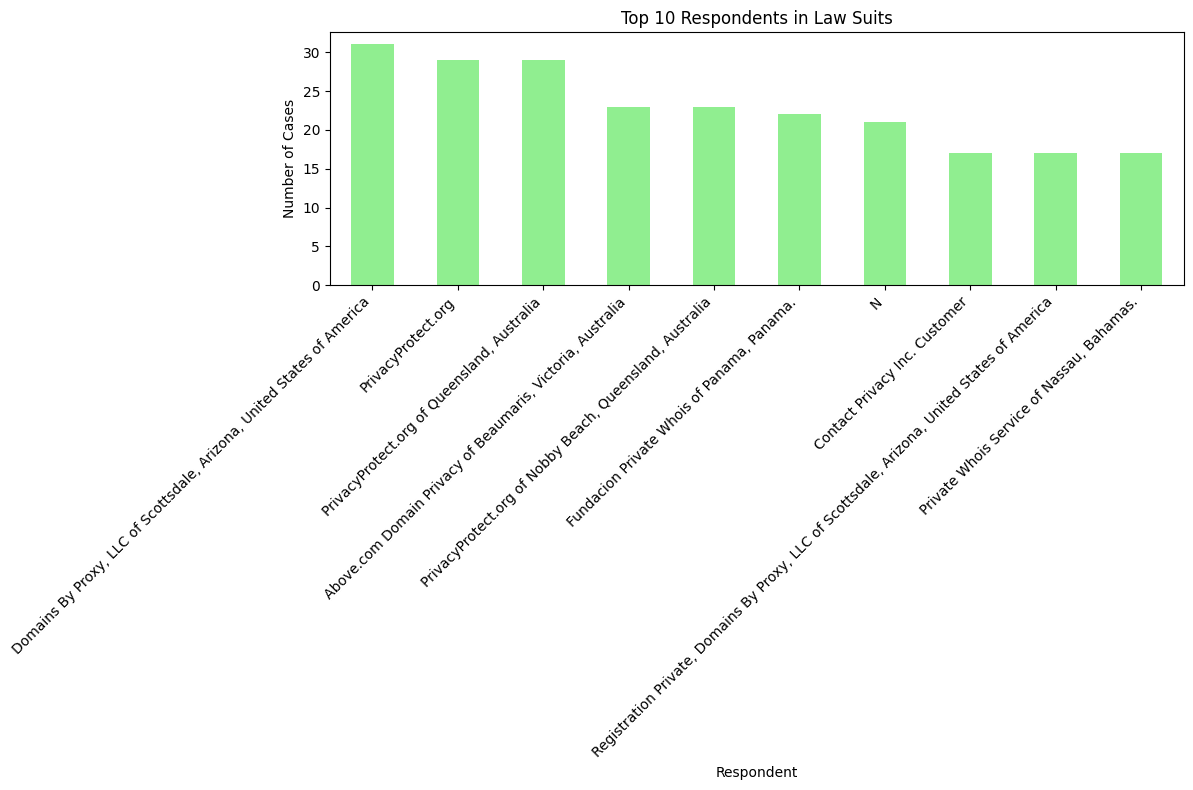

'Visualizes the top plaintiffs and respondents in law suits based on their occurrences in the dataset.'

In [16]:
# Count the occurrences of each plaintiff
plaintiff_counts = df['Plaintiff'].value_counts()

# Count the occurrences of each defendant
respondent_counts = df['Respondent_Name'].value_counts()

# Plot the bar chart for plaintiffs
plt.figure(figsize=(12, 8))
plaintiff_counts.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Plaintiff in Law Suits')
plt.xlabel('Plaintiff')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

# Plot the bar chart for defendants
plt.figure(figsize=(12, 8))
respondent_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Respondents in Law Suits')
plt.xlabel('Respondent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')  # Adjust rotation angle and alignment
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()
'''Visualizes the top plaintiffs and respondents in law suits based on their occurrences in the dataset.'''


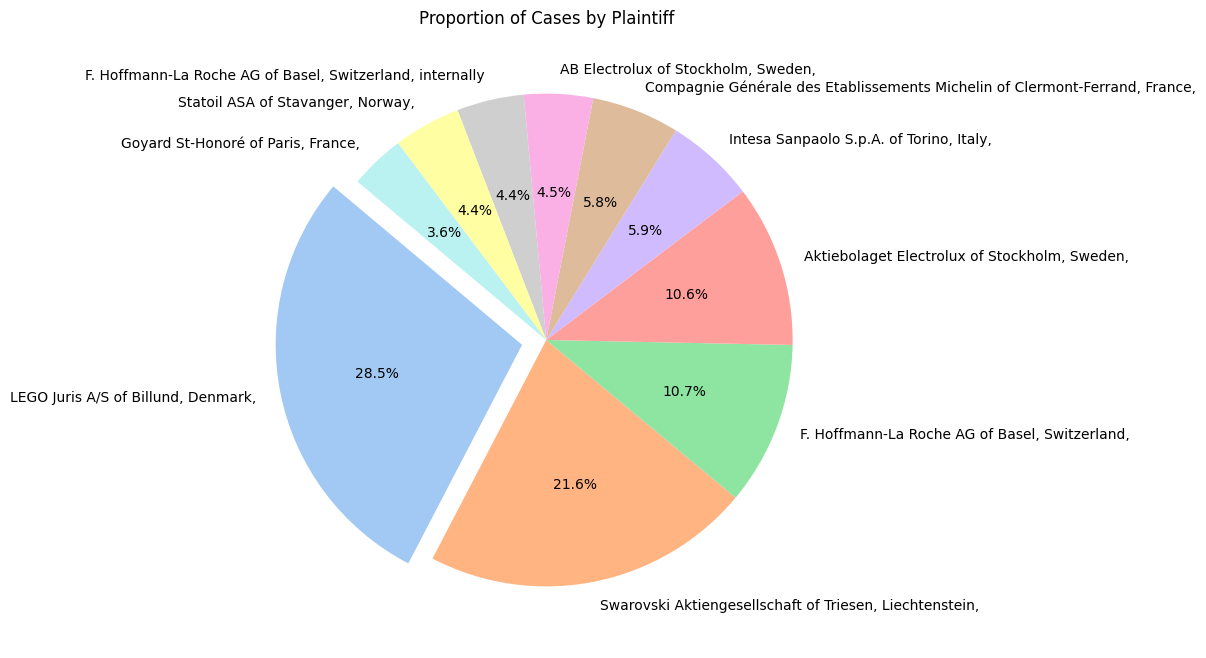

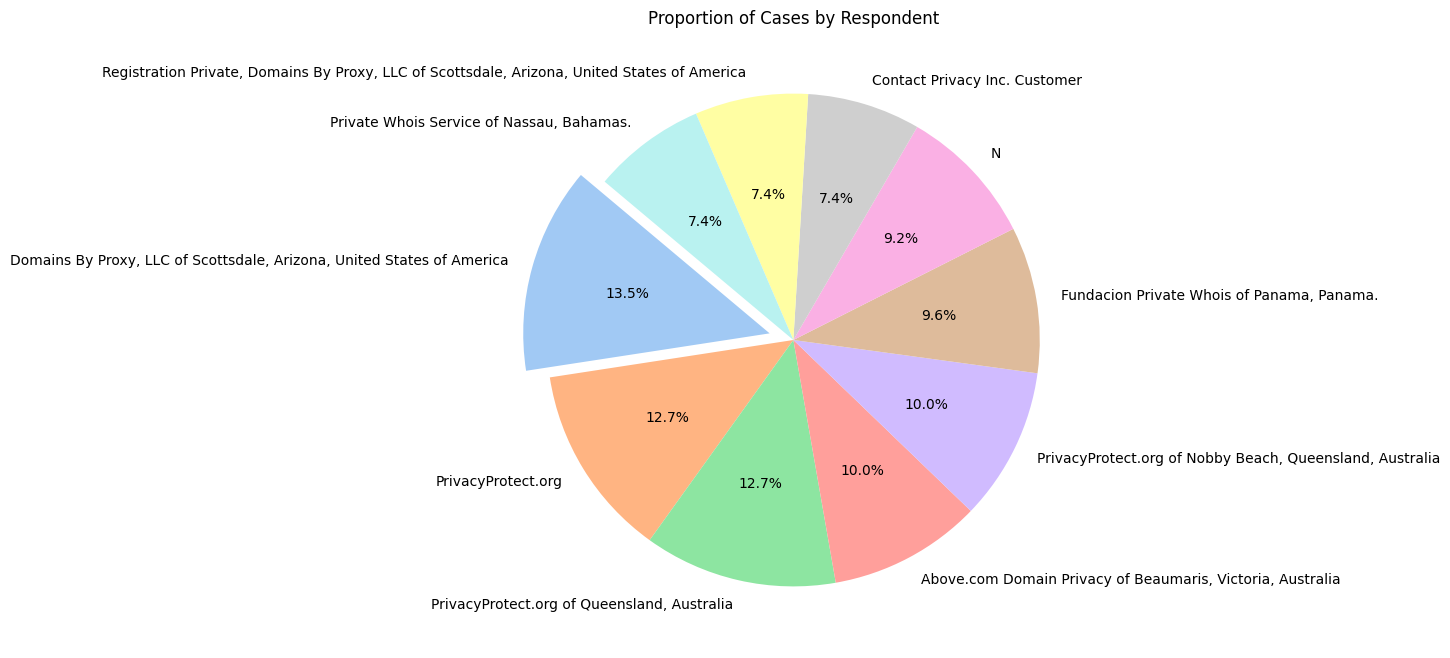

'Visualizes the proportion of cases by plaintiff and respondent using pie charts.'

In [17]:
# Count the occurrences of each plaintiff
plaintiff_counts = df['Plaintiff'].value_counts()

# Count the occurrences of each defendant
defendant_counts = df['Respondent_Name'].value_counts()

# Plot the pie chart for plaintiffs
plt.figure(figsize=(8, 8))
plaintiff_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title('Proportion of Cases by Plaintiff')
plt.ylabel('')
plt.show()

# Plot the pie chart for defendants
plt.figure(figsize=(8, 8))
defendant_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title('Proportion of Cases by Respondent')
plt.ylabel('')
plt.show()

'''Visualizes the proportion of cases by plaintiff and respondent using pie charts.'''

<Figure size 1200x800 with 0 Axes>

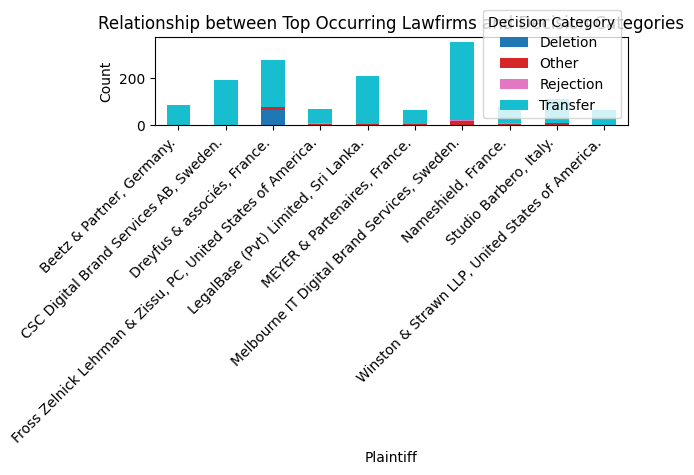

'Visualizes the relationship between the top occurring plaintiffs and decision categories in law suits using a stacked bar chart.'

In [18]:
# Get the top occurring plaintiffs based on the total number of cases they are involved in
top_plaintiffs = df['Lawfirms'].value_counts().index[:10]

# Filter the DataFrame to include only the cases involving the top occurring plaintiffs
df_top_plaintiffs = df[df['Lawfirms'].isin(top_plaintiffs)]

# Create a cross-tabulation of top occurring plaintiffs and decision categories
plaintiff_decision_ct = pd.crosstab(df_top_plaintiffs['Lawfirms'], df_top_plaintiffs['Decision_Categories'])

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
plaintiff_decision_ct.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Relationship between Top Occurring Lawfirms and Decision Categories')
plt.xlabel('Plaintiff')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment of labels
plt.legend(title='Decision Category')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
'''Visualizes the relationship between the top occurring plaintiffs and decision categories in law suits using a stacked bar chart.'''

/var/folders/k4/ksv2693148b4hflbdw_v9blw0000gn/T/ipykernel_99217/2812295898.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping


<Figure size 1200x800 with 0 Axes>

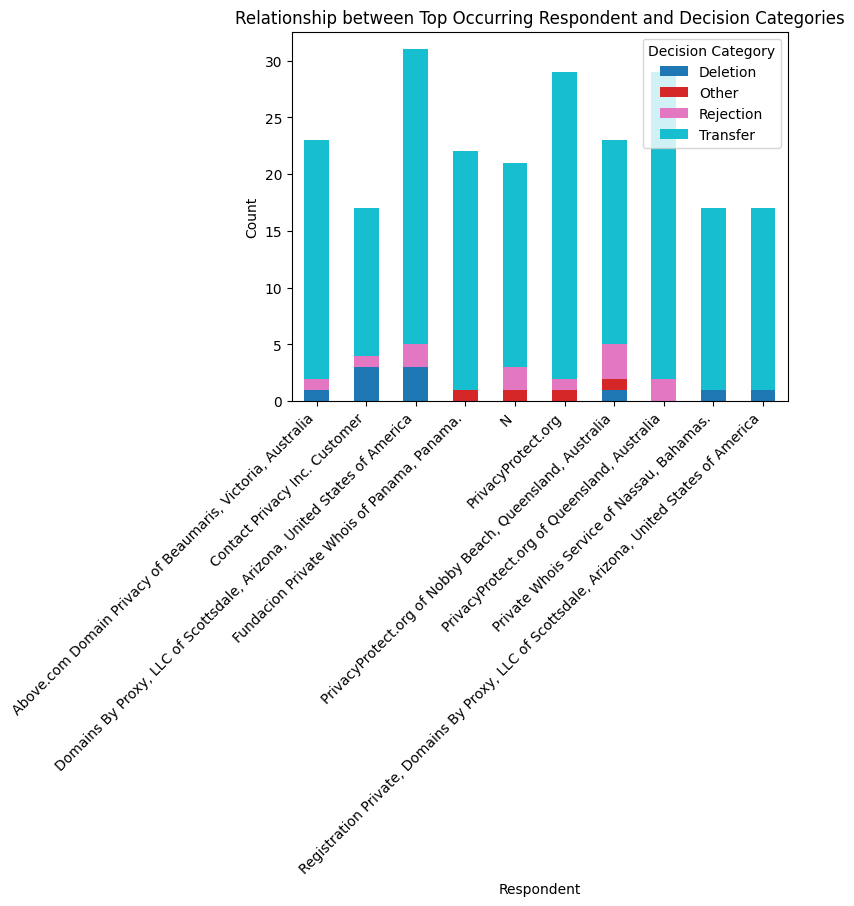

'Visualizes the relationship between the top occurring defendants and decision categories in law suits using a stacked bar chart.'

In [19]:
# Get the top occurring plaintiffs based on the total number of cases they are involved in
top_plaintiffs = df['Respondent_Name'].value_counts().index[:10]

# Filter the DataFrame to include only the cases involving the top occurring plaintiffs
df_top_plaintiffs = df[df['Respondent_Name'].isin(top_plaintiffs)]

# Create a cross-tabulation of top occurring plaintiffs and decision categories
plaintiff_decision_ct = pd.crosstab(df_top_plaintiffs['Respondent_Name'], df_top_plaintiffs['Decision_Categories'])

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
plaintiff_decision_ct.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Relationship between Top Occurring Respondent and Decision Categories')
plt.xlabel('Respondent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and horizontal alignment of labels
plt.legend(title='Decision Category')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
'''Visualizes the relationship between the top occurring defendants and decision categories in law suits using a stacked bar chart.'''


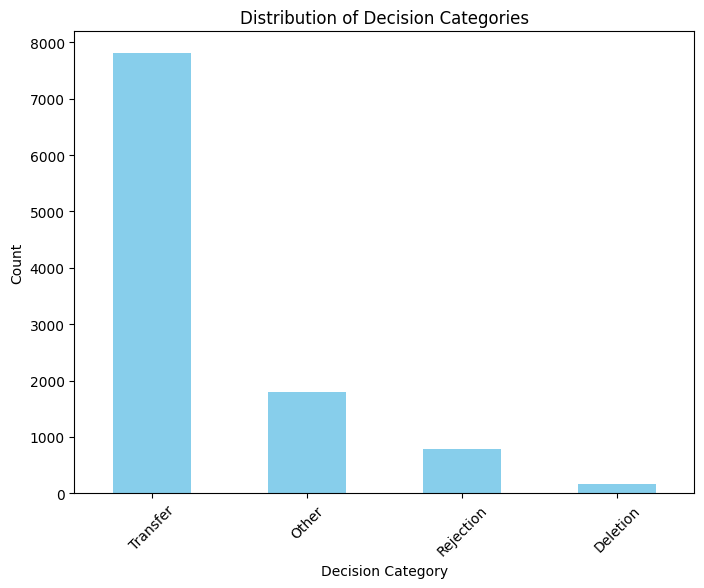

'The code calculates the distribution of decision categories in the DataFrame and visualizes it using a bar plot.'

In [20]:

# Count the occurrences of each decision category
decision_counts = df['Decision_Categories'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
decision_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Decision Categories')
plt.xlabel('Decision Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

'''The code calculates the distribution of decision categories in the DataFrame and visualizes it using a bar plot.'''

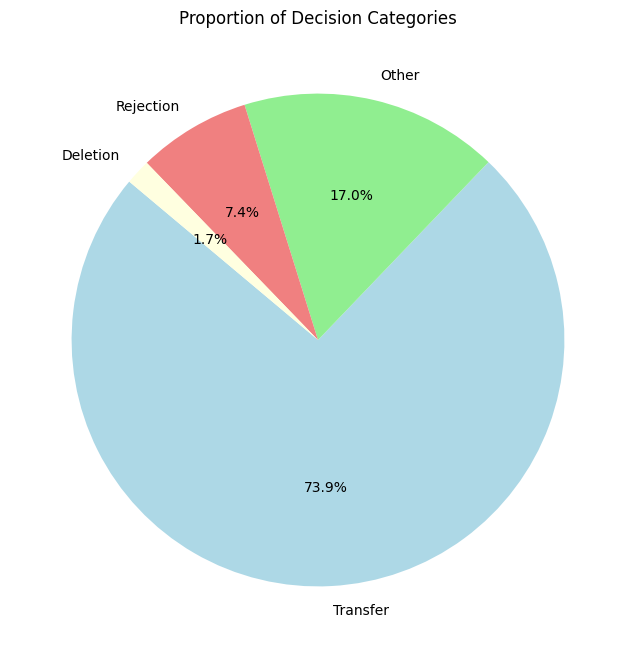

'The code creates a pie chart to illustrate the proportion of different decision categories in the DataFrame.'

In [21]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Proportion of Decision Categories')
plt.show()
'''The code creates a pie chart to illustrate the proportion of different decision categories in the DataFrame.'''

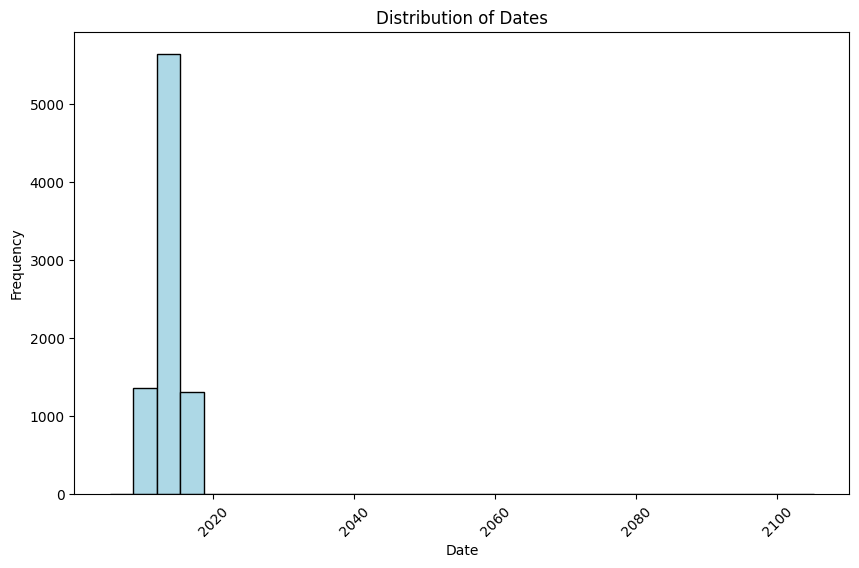

"The code converts the 'Dates' column in the DataFrame to datetime format and creates a histogram to show the distribution of dates."

In [22]:
# Convert 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Dates'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
'''The code converts the 'Dates' column in the DataFrame to datetime format and creates a histogram to show the distribution of dates.'''

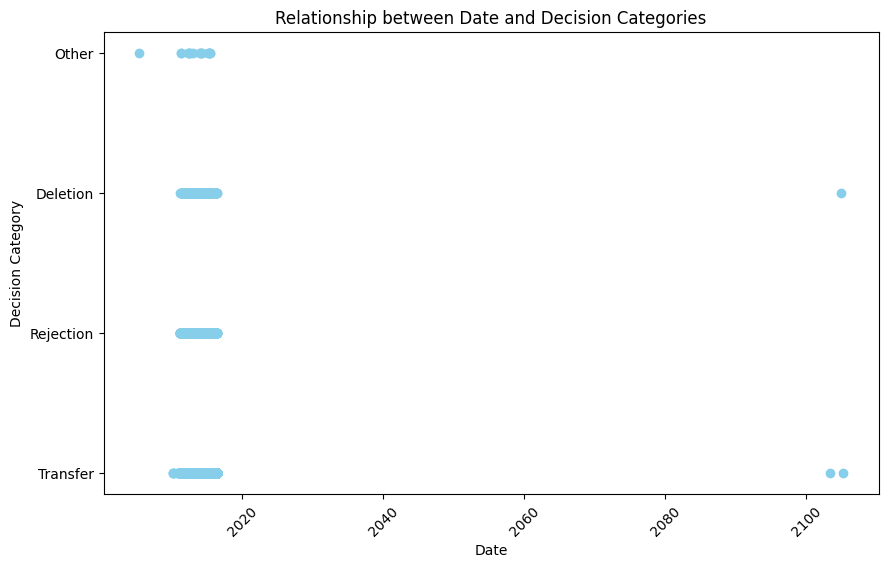

"The code converts the 'Date' column in the DataFrame to datetime format and creates a scatter plot to show the relationship between dates and decision categories."

In [23]:
# Convert 'Date' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Dates'], df['Decision_Categories'], color='skyblue')
plt.title('Relationship between Date and Decision Categories')
plt.xlabel('Date')
plt.ylabel('Decision Category')
plt.xticks(rotation=45)
plt.show()
'''The code converts the 'Date' column in the DataFrame to datetime format and creates a scatter plot to show the relationship between dates and decision categories.'''

/var/folders/k4/ksv2693148b4hflbdw_v9blw0000gn/T/ipykernel_99217/546704820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision_Categories', y='Numeric Dates', data=df, palette='Set3')


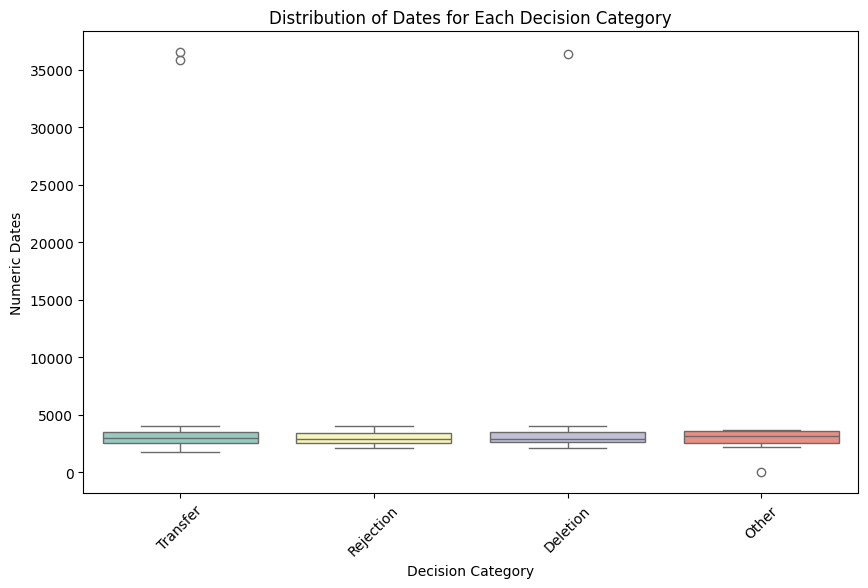

"\nThe code converts the 'Dates' column in the DataFrame to datetime objects, extracts the numeric representation of dates (number of days since a reference date), and then creates a box plot to show the distribution of dates for each decision category."

In [24]:


# Convert 'Dates' column to datetime objects
df['Dates'] = pd.to_datetime(df['Dates'])

# Extract the numeric representation of dates (e.g., number of days since a reference date)
df['Numeric Dates'] = (df['Dates'] - df['Dates'].min()).dt.days

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decision_Categories', y='Numeric Dates', data=df, palette='Set3')
plt.title('Distribution of Dates for Each Decision Category')
plt.xlabel('Decision Category')
plt.ylabel('Numeric Dates')
plt.xticks(rotation=45)
plt.show()
'''
The code converts the 'Dates' column in the DataFrame to datetime objects, extracts the numeric representation of dates (number of days since a reference date), and then creates a box plot to show the distribution of dates for each decision category.'''

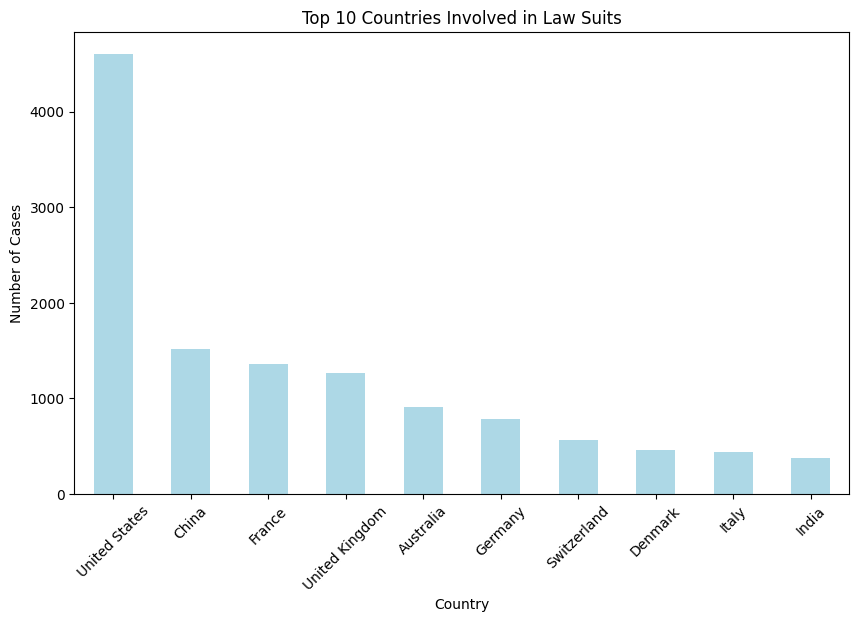

'The code calculates the total number of cases involving each country, considering both parties involved in the lawsuits (Plaintiff and Respondent). It then creates a bar chart to visualize the top 10 countries involved in the lawsuits, showing the number of cases for each country.'

In [25]:
# Count the occurrences of each country in Party 1
party1_country_counts = df['Countries_Plaintiff'].value_counts()

# Count the occurrences of each country in Party 2
party2_country_counts = df['Countries_Respondent'].value_counts()

# Concatenate both counts
country_counts = party1_country_counts.add(party2_country_counts, fill_value=0)

# Sort the counts in descending order
country_counts = country_counts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
country_counts.head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Countries Involved in Law Suits')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

'''The code calculates the total number of cases involving each country, considering both parties involved in the lawsuits (Plaintiff and Respondent). It then creates a bar chart to visualize the top 10 countries involved in the lawsuits, showing the number of cases for each country.'''

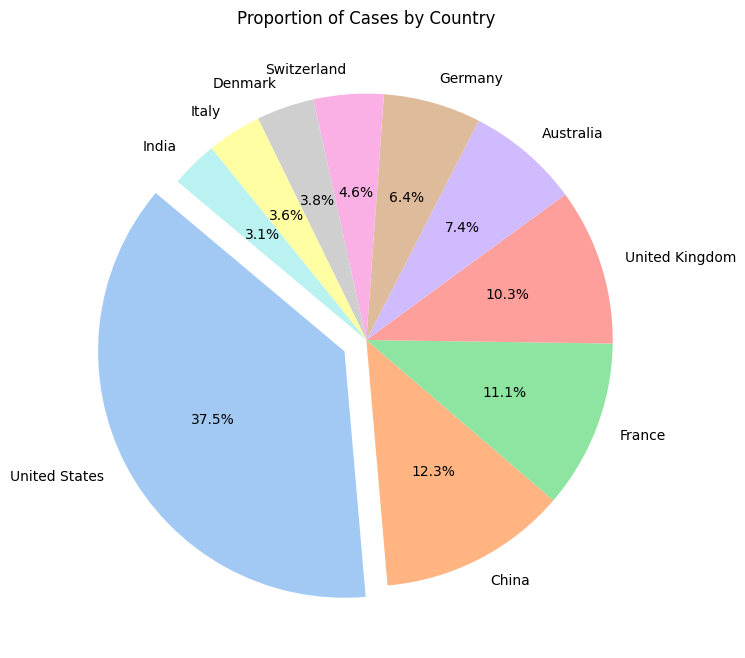

'The code generates a pie chart representing the proportion of cases by country. It specifically focuses on the top 10 countries involved in the lawsuits and displays the percentage distribution of cases for each country. The chart is color-coded using a pastel color palette, and an explosion effect is applied to highlight one of the slices.'

In [26]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
country_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title('Proportion of Cases by Country')
plt.ylabel('')
plt.show()

'''The code generates a pie chart representing the proportion of cases by country. It specifically focuses on the top 10 countries involved in the lawsuits and displays the percentage distribution of cases for each country. The chart is color-coded using a pastel color palette, and an explosion effect is applied to highlight one of the slices.'''

<Figure size 1200x800 with 0 Axes>

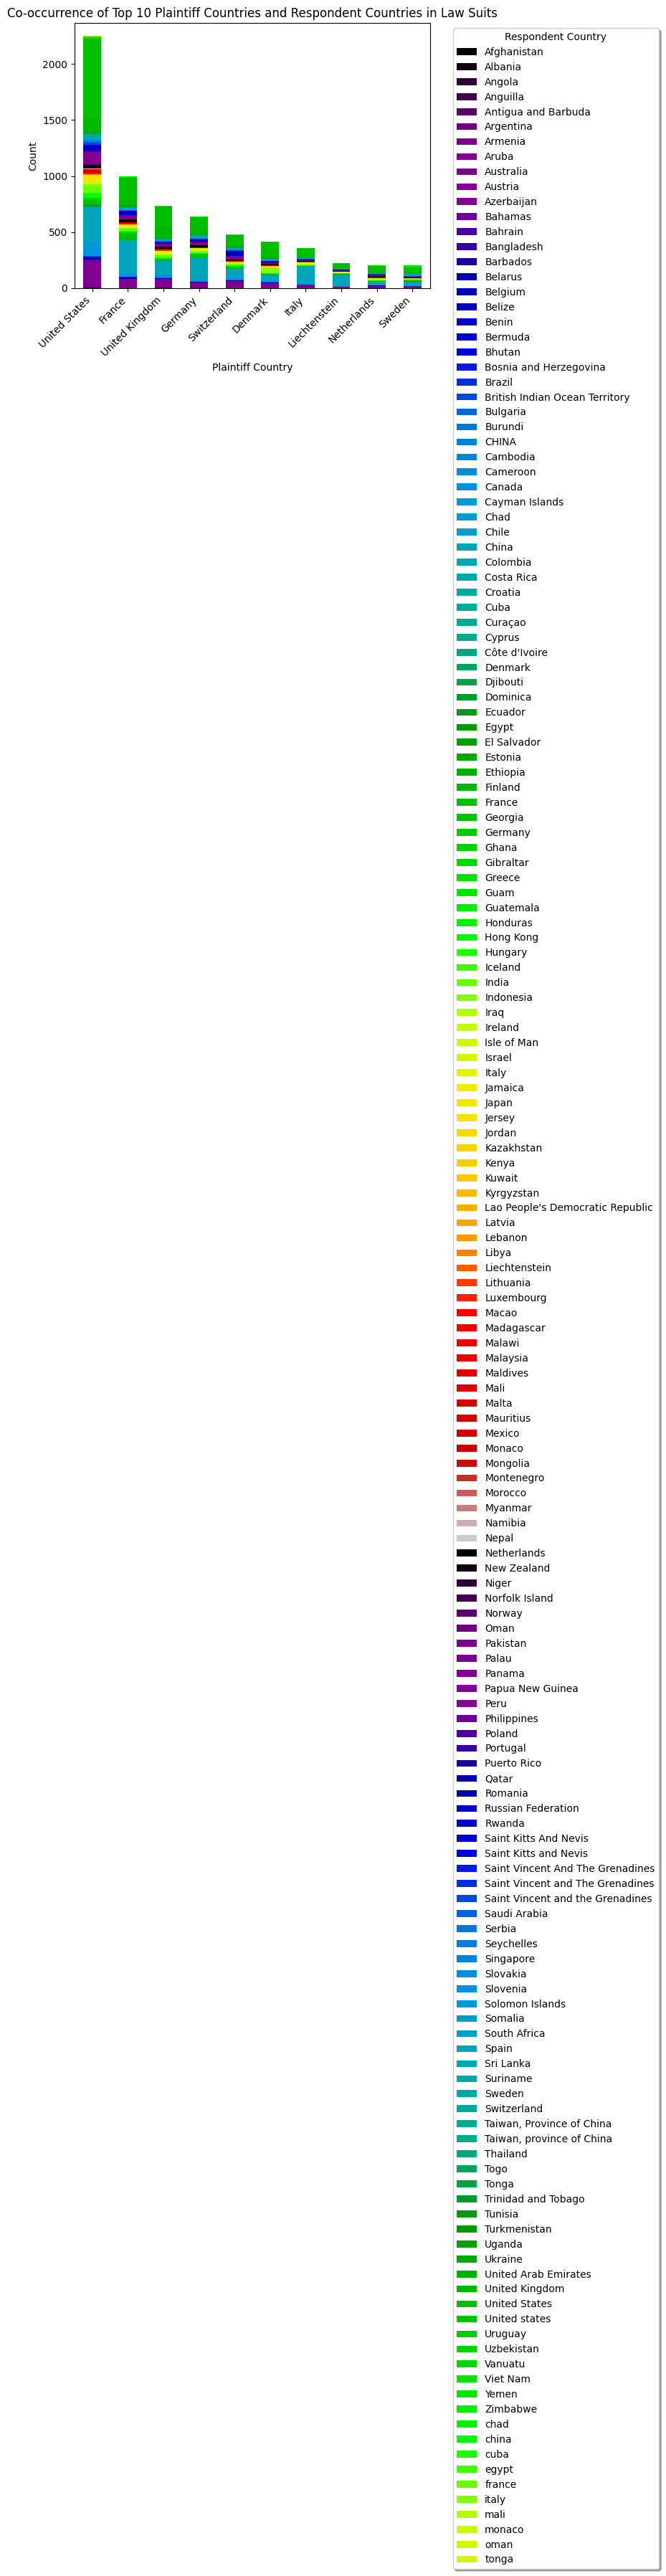

'\nThe code generates a stacked bar chart that visualizes the co-occurrence of countries in law suits. Each bar represents a plaintiff country, and the height of each segment within the bar corresponds to the count of cases where that plaintiff country was involved in legal disputes with different defendant countries. The colors of the segments differentiate between the defendant countries. This visualization allows for easy comparison of the distribution of cases across different plaintiff countries and the countries they are involved with as defendants.'

In [27]:
co_occurrence = pd.crosstab(df['Countries_Plaintiff'], df['Countries_Respondent'])

# Filter co-occurrence DataFrame to include only the top 10 plaintiff countries
top_plaintiff_countries = co_occurrence.sum(axis=1).nlargest(10).index
co_occurrence_top10 = co_occurrence.loc[top_plaintiff_countries]

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
import numpy as np
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
co_occurrence_top10.plot(kind='bar', stacked=True, color=colors)
plt.title('Co-occurrence of Top 10 Plaintiff Countries and Respondent Countries in Law Suits')
plt.xlabel('Plaintiff Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Set the labels in horizontal axis
plt.gca().set_xticklabels(co_occurrence_top10.index, rotation=45, ha='right')

# Set the legend orientation to horizontal
plt.legend(title='Respondent Country', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fancybox=True, shadow=True)

plt.show()

'''
The code generates a stacked bar chart that visualizes the co-occurrence of countries in law suits. Each bar represents a plaintiff country, and the height of each segment within the bar corresponds to the count of cases where that plaintiff country was involved in legal disputes with different defendant countries. The colors of the segments differentiate between the defendant countries. This visualization allows for easy comparison of the distribution of cases across different plaintiff countries and the countries they are involved with as defendants.'''

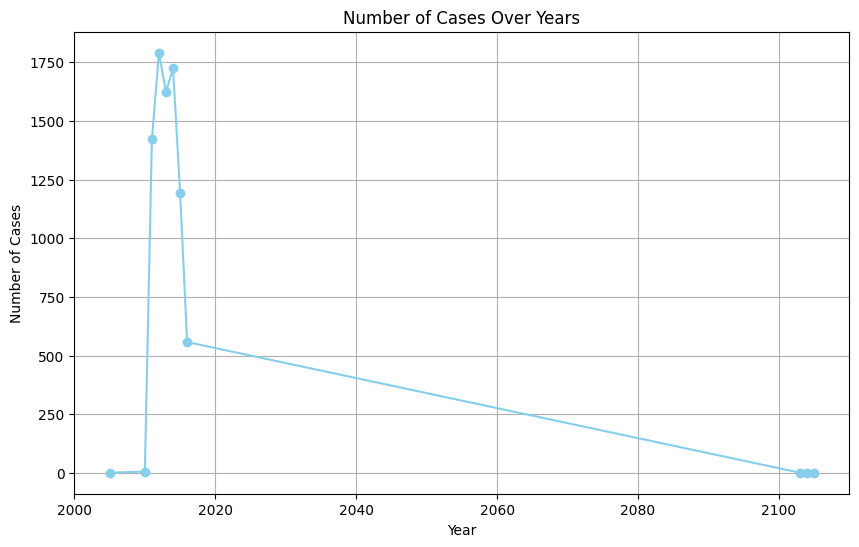

"The code extracts the year from the 'Date' column and then groups the data by year, counting the number of cases for each year. Finally, it plots a time series showing the number of cases over the years, providing insight into the trend of cases over time."

In [28]:
# Extract year from the 'Date' column
df['Year'] = df['Dates'].dt.year

# Group by year and count the number of cases
cases_by_year = df.groupby('Year').size()

# Plot the time series of cases over years
plt.figure(figsize=(10, 6))
cases_by_year.plot(marker='o', color='skyblue')
plt.title('Number of Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

'''The code extracts the year from the 'Date' column and then groups the data by year, counting the number of cases for each year. Finally, it plots a time series showing the number of cases over the years, providing insight into the trend of cases over time.'''

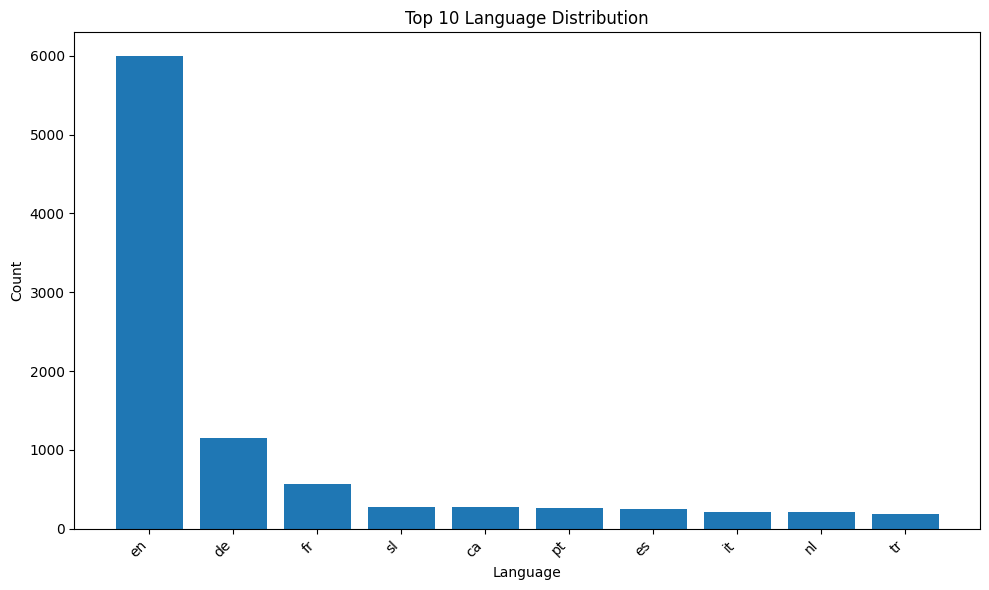

In [29]:
language_counts = df['Detected Language'].value_counts()

# Select top 10 occurring languages
top_10_languages = language_counts.head(10)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_languages.index, top_10_languages)
plt.title('Top 10 Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()